### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# read the 3 datasets into dataframes
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

In [3]:
# inspect top 5 rows of 'data' dataframe
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# inspect top 5 rows of 'item' dataframe
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# inspect top 5 rows of 'user' dataframe
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [6]:
# data - info of 'data' dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
# data - shape of 'data' dataframe
data.shape

(100000, 4)

In [8]:
 # data - describe 'continuous' types in 'data' dataframe (transposed)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [9]:
# data- describe 'object' types in 'data' dataframe
# --> no 'object' types in this dataframe

In [10]:
# data - missing values (only NaN) by column in 'data' dataframe 
data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [11]:
# item - info of 'item' dataframe
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
# item - shape of 'item' dataframe
item.shape

(1681, 22)

In [13]:
# item - describe 'continuous' types in 'item' dataframe (transposed)
item.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [14]:
# item - describe 'object' types in 'item' dataframe (transposed)
item.describe(include='object').T

,count,unique,top,freq
movie title,1681,1658,That Darn Cat!,3
release date,1681,240,01-Jan-1995,215


In [15]:
# item - missing values (only NaN) by column in 'item' dataframe 
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [16]:
# user - find info of 'user' dataframe
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
# user - find shape of 'user' dataframe
user.shape

(943, 5)

In [18]:
# user - describe 'continuous' types in 'user' dataframe (transposed)
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [19]:
# user - describe 'object' types in 'user' dataframe (transposed)
user.describe(include='object').T

,count,unique,top,freq
gender,943,2,M,670
occupation,943,21,student,196
zip code,943,795,55414,9


In [20]:
# user - missing values (only NaN) by column in 'user' dataframe 
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [21]:
# sum only the genre columns from 'item' dataframe 
item.drop(columns=['movie id', 'movie title', 'release date'], axis=1).sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [22]:
# display only movies that have more than one genre
# we filter these by summing only the 'genre' elements for each row and testing if sum > 1
item[(item.drop(columns=['movie id', 'movie title', 'release date'], axis=1).sum(axis=1)) > 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [23]:
# drop the row by filtering on 'unknown' value equal to 1 (or equal to True)
# Note: item.drop(item[item.unknown == 1].index, inplace = True) # permanent removal of row from 'item' dataframe
item.drop(item[item.unknown == 1].index)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [24]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [25]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


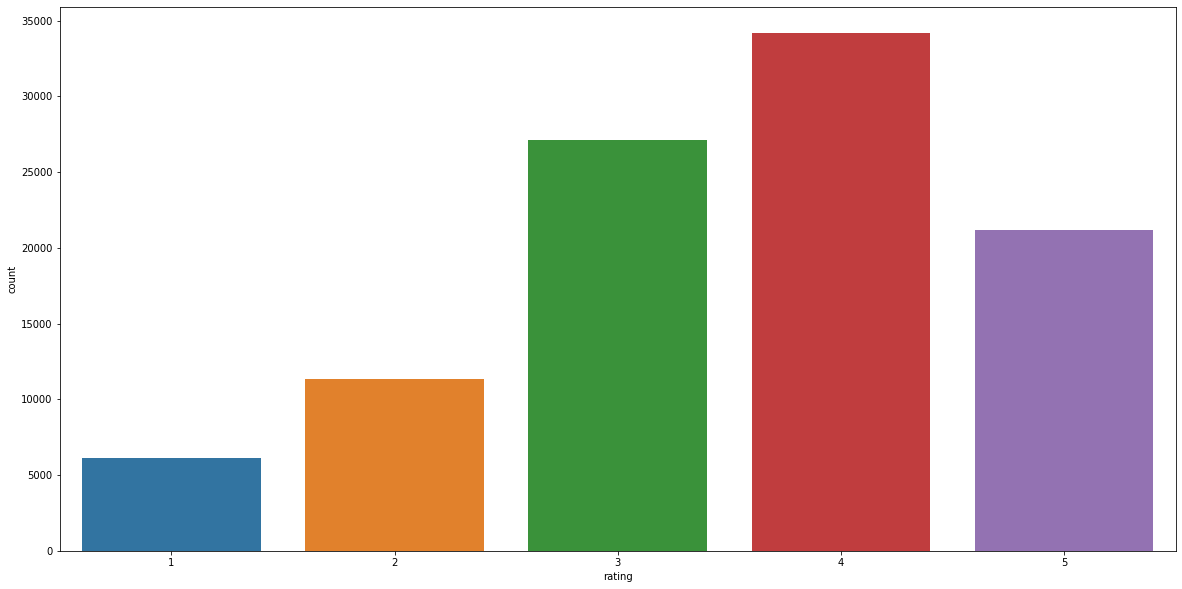

In [26]:
# Univariate plot for 'rating' (countplot)
plt.subplots(figsize=(20, 10))
sns.countplot(data['rating'])
plt.show()

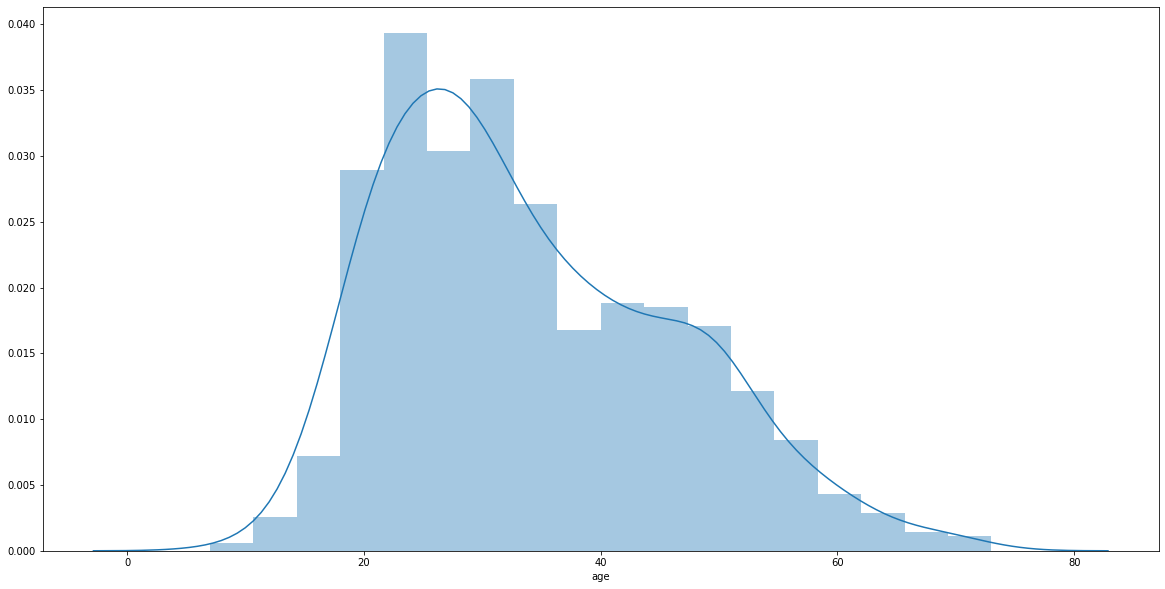

In [27]:
# Univariate plot for 'age' (distplot)
plt.subplots(figsize=(20, 10))
sns.distplot(user['age'])
plt.show()

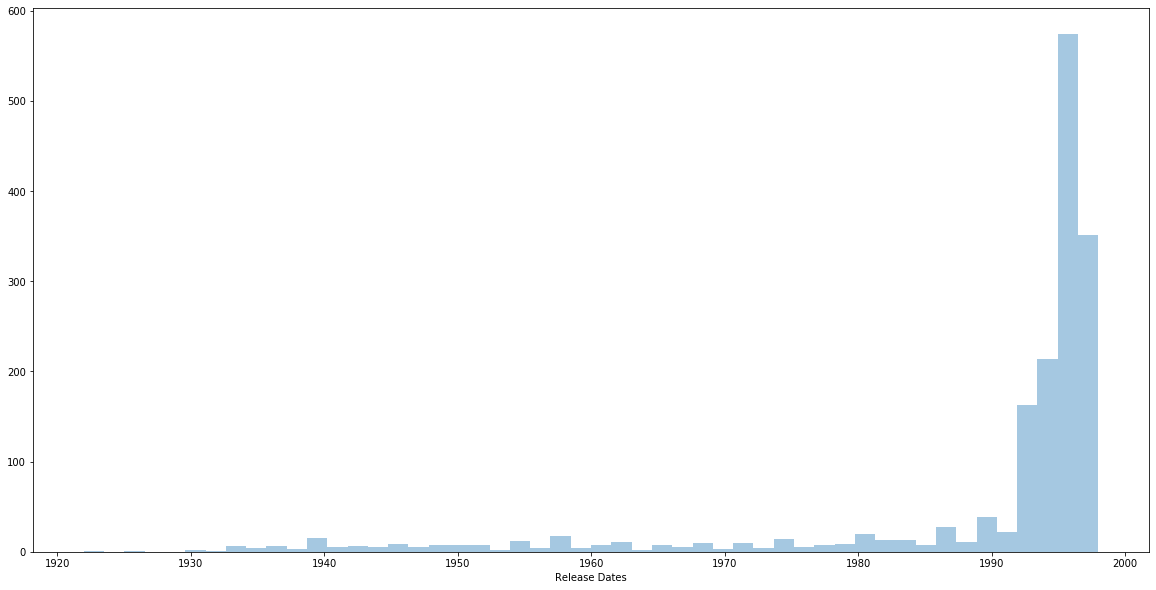

In [28]:
# Univariate plot for 'release dates'
plt.subplots(figsize=(20, 10))
sns.distplot(item['release date'].str.split('-', expand=True)[2], kde=False, axlabel='Release Dates')
plt.show()

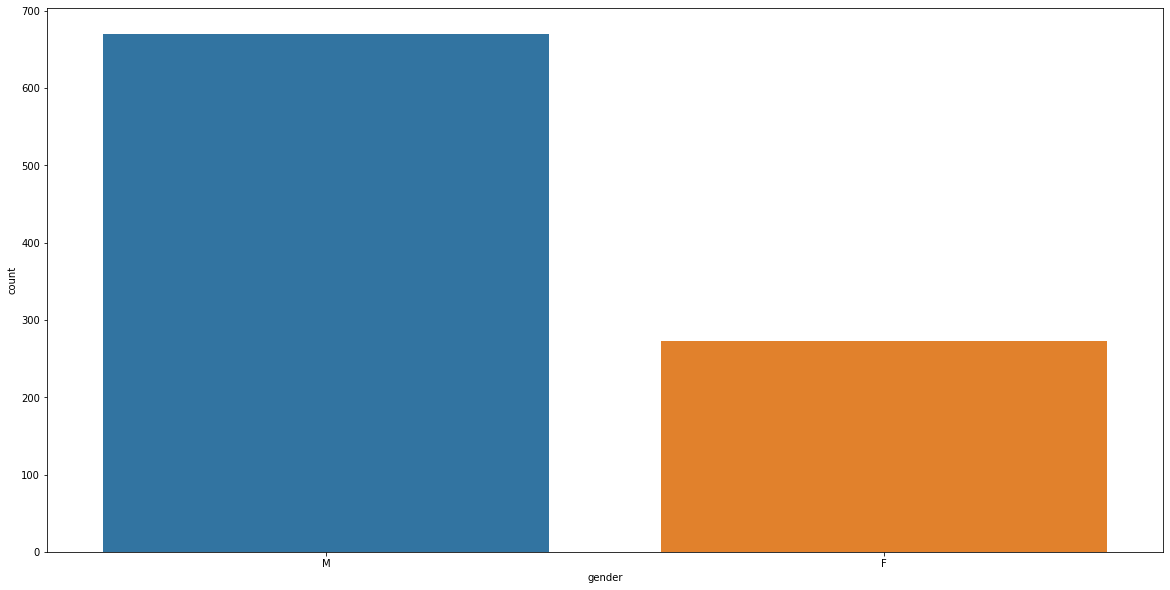

In [29]:
# Univariate plot for 'gender' (countplot)
plt.subplots(figsize=(20, 10))
sns.countplot(user['gender'])
plt.show()

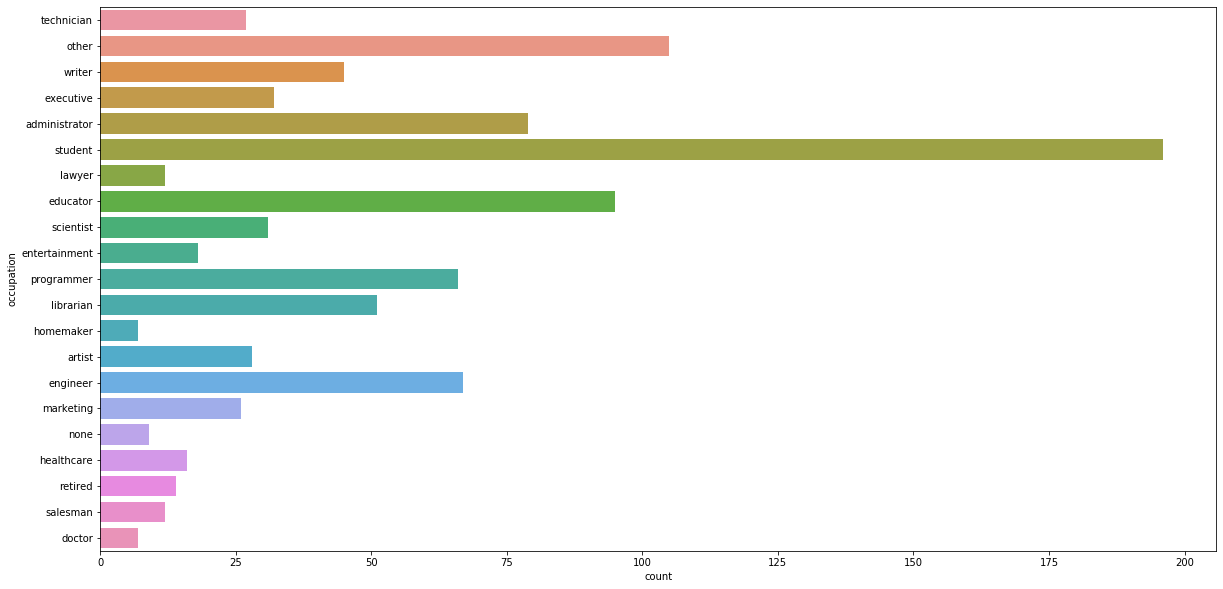

In [30]:
# Univariate plot for 'occupation' (countplot)
plt.subplots(figsize=(20, 10))
sns.countplot(y=user['occupation'])
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [31]:
# create dataframe called 'popularity' that contains only the genre-specific columns
popularity = item.drop(columns=['movie id', 'movie title', 'release date'], axis=1)

# add 'release year' column by parsing year from the 'release year' column
popularity['release year'] = item['release date'].str.split('-', expand=True)[2].astype(int)

# groupby 'release year' and set it as the index
popularity=popularity.groupby(by=['release year']).sum().reset_index().sort_values(['release year'], ascending=True)
popularity.set_index('release year', inplace=True)

# display new dataframe for inspection
popularity

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


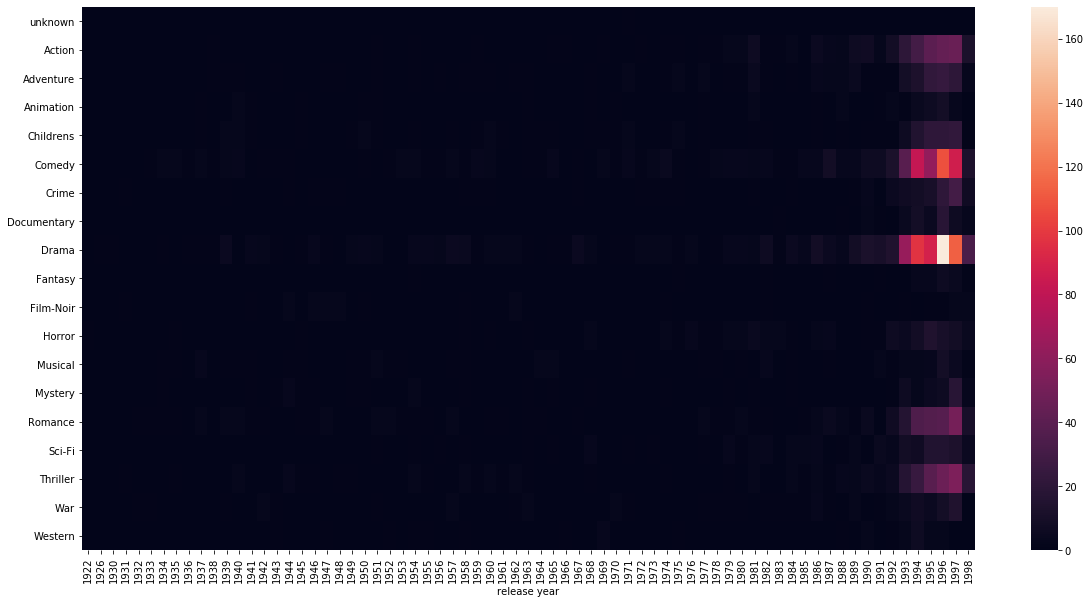

In [32]:
# visualize with a heatmap
plt.subplots(figsize=(20, 10))
sns.heatmap(popularity.T)
plt.show()

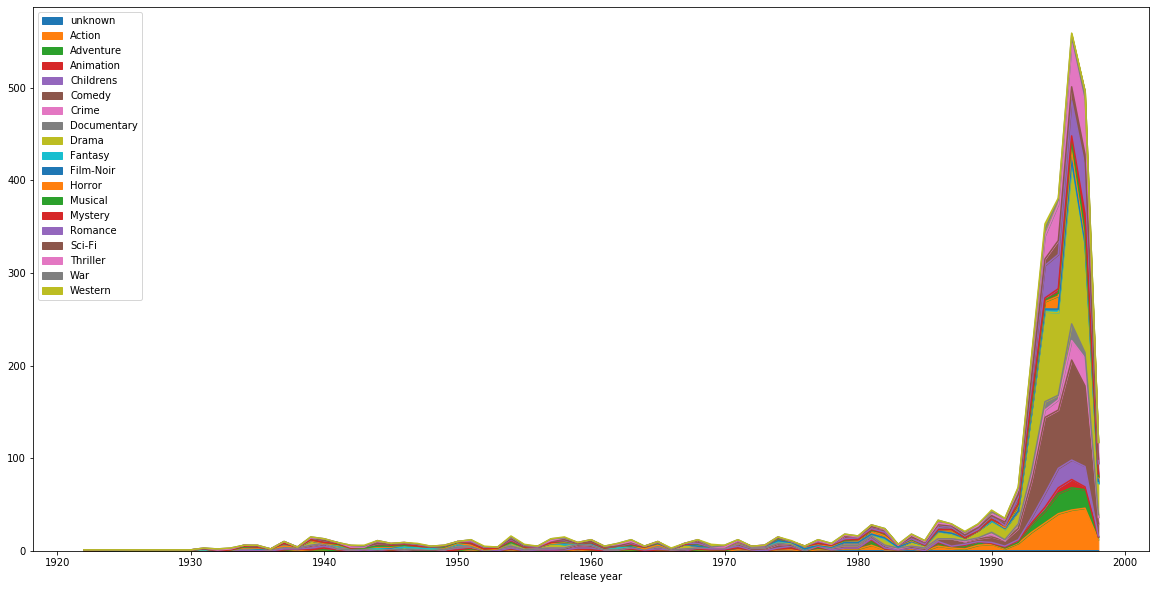

In [33]:
# visulaize with a stacked area chart
popularity.plot(kind='area', figsize=(20,10))

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [34]:
# merge 'item' and 'data' dataframes using intersection
movies_merged = pd.merge(item,data,how='inner',on='movie id')

# groupby 'movie id' and 'movie title' and sum ratings
ratings_sum = movies_merged.groupby(['movie id', 'movie title'], as_index=False)['rating'].sum()

# change column label of 'rating' to 'rating_sum'
ratings_sum.rename(columns={'rating':'rating_sum'}, inplace=True)

# groupby 'movie id' and 'movie title' and count ratings
ratings_cnt = movies_merged.groupby(['movie id', 'movie title'], as_index=False)['rating'].count()

# change column label of 'rating' to 'rating_cnt'
ratings_cnt.rename(columns={'rating':'rating_cnt'}, inplace=True)

# create dataframe with ratings average
ratings_avg = ratings_sum
ratings_avg['rating_cnt'] = ratings_cnt['rating_cnt']
ratings_avg['rating_avg'] = ratings_avg['rating_sum'].div(ratings_avg['rating_cnt'], axis=0)

# create dataframe with movies with greater than 100 ratings
# note: instructions say GREATER than 100
movies_w100 = ratings_avg
movies_w100.drop(movies_w100[movies_w100.rating_cnt <= 100].index, inplace=True)

# create dataframe of top 25 movies with greater than 100 ratings
movies_top25 = movies_w100
movies_top25.sort_values(by='rating_avg', ascending=False, inplace=True)
movies_top25 = movies_top25.head(25)

# Answer: display the top 25 rated movies with greater than 100 ratings 
movies_top25

,movie id,movie title,rating_sum,rating_cnt,rating_avg
406,408,"Close Shave, A",503,112,4.491071
316,318,Schindler's List,1331,298,4.466443
168,169,"Wrong Trousers, The",527,118,4.466102
481,483,Casablanca,1083,243,4.456790
63,64,"Shawshank Redemption, The",1258,283,4.445230
601,603,Rear Window,917,209,4.387560
11,12,"Usual Suspects, The",1171,267,4.385768
49,50,Star Wars,2541,583,4.358491
177,178,12 Angry Men,543,125,4.344000
133,134,Citizen Kane,850,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [35]:
# merge 'item' and 'data' dataframes using intersection
movies_merged = pd.merge(item, data, how='inner', on='movie id')

# merge 'movies_merged' and 'user' dataframes using intersection
movies_merged = pd.merge(movies_merged, user, how='inner', on='user id')

# groupby 'gender' to get number genre sums for each gender
genre_by_gender = movies_merged.groupby(['gender'], as_index=False)['Drama','Sci-Fi','Romance'].sum()

# groupby 'gender' to get total count of rating for each gender
ratings_by_gender = movies_merged.groupby(['gender'], as_index=False)['rating'].count()

# change column label of 'rating' to 'rating_cnt'
ratings_by_gender.rename(columns={'rating':'rating_cnt'}, inplace=True)

# create final dataframe with percentages
percent_by_gender = genre_by_gender;
percent_by_gender['rating_cnt'] = ratings_by_gender['rating_cnt']
percent_by_gender['Drama_Percent'] = percent_by_gender['Drama'].div(percent_by_gender['rating_cnt']).mul(100)
percent_by_gender['SciFi_Percent'] = percent_by_gender['Sci-Fi'].div(percent_by_gender['rating_cnt']).mul(100)
percent_by_gender['Romance_Percent'] = percent_by_gender['Romance'].div(percent_by_gender['rating_cnt']).mul(100)
                                                                                                          
# display the dataframe for comparison
percent_by_gender                                                                                                          


,gender,Drama,Sci-Fi,Romance,rating_cnt,Drama_Percent,SciFi_Percent,Romance_Percent
0,F,11008,2629,5858,25738,42.769446,10.214469,22.760121
1,M,28887,10101,13603,74253,38.903479,13.603491,18.319799


#### Conclusion:



1) Men watch more drama than women is FALSE

2) Women watch more Sci-Fi than men is FALSE

3) Men watch more Romance than women is FALSE